In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from sklearn.metrics import classification_report
from keras.utils import to_categorical
from keras.layers import Dropout

import warnings

In [7]:
df = pd.read_csv('/content/d - Sheet1.csv')

In [9]:
print(f'Number of rows : {df.shape[0]}\nNumber of columns : {df.shape[1]}')

Number of rows : 24
Number of columns : 9


In [10]:
duplicate_rows = df[df.duplicated(subset=df.columns,keep='first')]
if duplicate_rows.shape[0] == 0 :
    print('There are no duplicate data entries.')
else:
    df = df.drop_duplicates(keep='first')
    print(f'{duplicate_rows.shape[0]} duplicate values found and removed. {df.shape[0]} unique values remain.')

There are no duplicate data entries.


In [11]:
summary_table = pd.DataFrame({
    "Unique_values": df.nunique(),
    "Data_type": df.dtypes,
    "Null_count": df.isnull().sum(),
    "Null_percentage": (df.isnull().sum()/df.shape[0]*100).round(2)
})

In [12]:
df.isnull().sum().sum()

0

<ipython-input-13-0df24985eef6>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette= colors)


,Count
Labels,
Diabetic,15
Non-diabetic,9


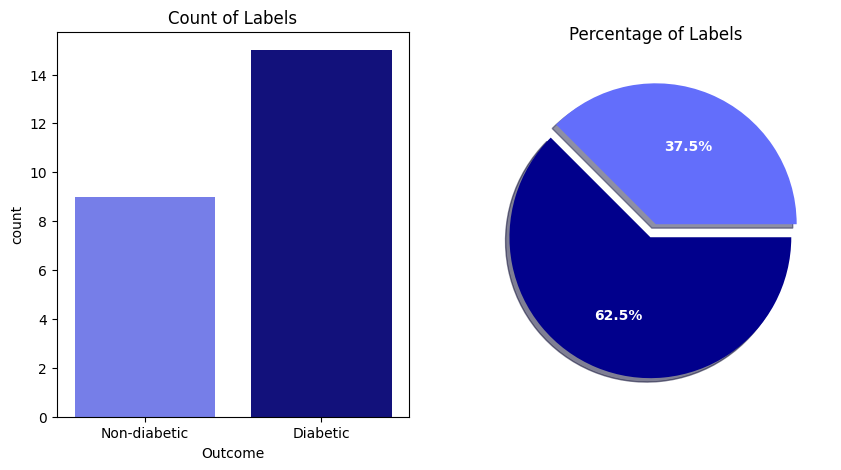

In [13]:
plt.figure(figsize=(10, 5))
colors = ['#636efb', '#01008c']
labels = ['Non-diabetic', 'Diabetic']

# count plot (counts) :
plt.subplot(1, 2, 1)
sns.countplot(x='Outcome', data=df, palette= colors)
plt.title('Count of Labels')
plt.xticks([0, 1], labels)

# value counts in class :
count_0 = df[df['Outcome'] == 0]['Outcome'].count()
count_1 = df[df['Outcome'] == 1]['Outcome'].count()
total_count = count_0 + count_1

# percentage of each value:
percentage_0 = (count_0 / total_count) * 100
percentage_1 = (count_1 / total_count) * 100

# pie chart (percentage):
plt.subplot(1, 2, 2)
plt.pie([percentage_0, percentage_1], labels=labels, autopct='%1.1f%%', colors=colors, shadow=True,
        explode = [0, 0.1],textprops={'color': 'white','weight': 'bold'})
plt.title('Percentage of Labels');

# Summary table:
class_counts = df['Outcome'].value_counts()
label_names = {0: 'Non-diabetic', 1: 'Diabetic'}
Outcome_counts_df = pd.DataFrame({'Labels': class_counts.index.map(label_names),
                                'Count': class_counts.values}
                              ).set_index('Labels')
Outcome_counts_df


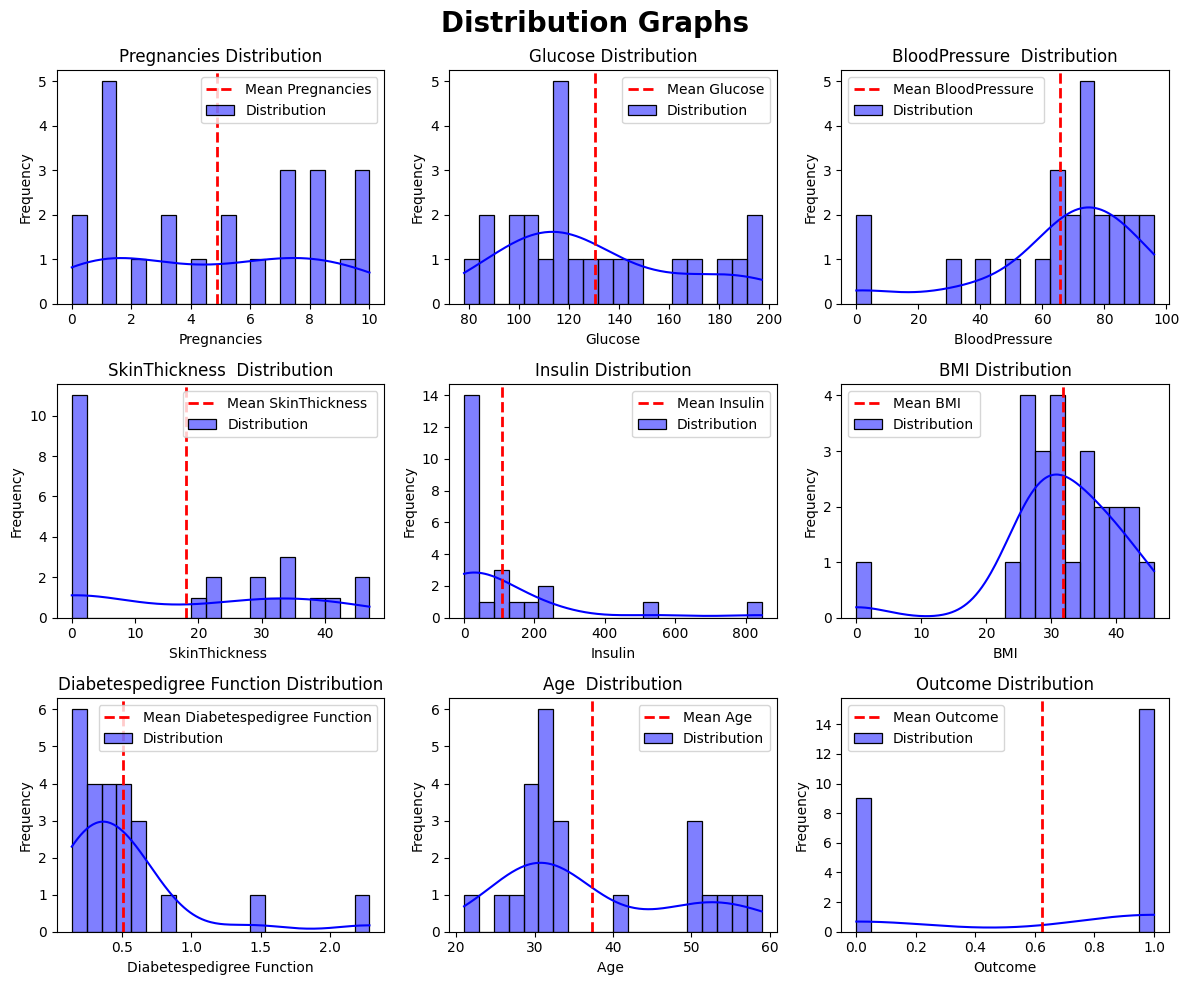

In [14]:
cols = df.columns
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(cols):
    ax = axes[i]
    sns.histplot(df[col], bins=20, kde=True, color='blue', ax=ax, label='Distribution')

    mean_value = df[col].mean()
    ax.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=('Mean ' + col))

    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.legend()
    ax.set_title(col + ' Distribution')

fig.suptitle('Distribution Graphs', fontsize=20, fontweight='bold');
plt.tight_layout()
plt.show()

In [19]:
# Helthy individuals with zero test value :
non_diabetic_test_zero = df[(df['Outcome'] == 0) & (df['Insulin'] == 0)]

# Calculating mean test value of nondiabetic individuals :
non_diabetic_test_mean = df[df['Outcome'] == 0]['Insulin'].mean()

# Replacing the Zero test values of healthy individuals with the mean test value of nondiabetic individuals :
df.loc[(df['Outcome'] == 0) & (df['Insulin'] == 0), 'Insulin'] = non_diabetic_test_mean

print(f'Number of Healthy samples with zero test value: {non_diabetic_test_zero.shape[0]}')
print(f'Average test value of the remaining healthy samples: {non_diabetic_test_mean}')

Number of Healthy samples with zero test value: 6
Average test value of the remaining healthy samples: 45.77777777777778


<ipython-input-19-5e1fa55248cf>:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '45.77777777777778' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df['Outcome'] == 0) & (df['Insulin'] == 0), 'Insulin'] = non_diabetic_test_mean


In [20]:
# Features:
X = df.iloc[:,:-1]

# Target :
y = df.iloc[:,-1:]

In [21]:
ss = StandardScaler()
X = ss.fit_transform(X)

In [22]:
X_train, X_test, y_train ,y_test = train_test_split(X, y, random_state = 42)

In [23]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [24]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=(8,)),
    Dropout(0.2),
    tf.keras.layers.Dense(30, activation='relu'),
    Dropout(0.2),
    tf.keras.layers.Dense(10, activation='relu'),
    Dropout(0.2),
    tf.keras.layers.Dense(2, activation='softmax'),
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 30)                  │             270 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             310 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │              22 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 674 (2.63 KB)

 Trainable params: 674 (2.63 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.002),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.CategoricalAccuracy()]
             )

In [28]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=10)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - categorical_accuracy: 0.6074 - loss: 0.6766 - val_categorical_accuracy: 0.8333 - val_loss: 0.6043
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - categorical_accuracy: 0.6370 - loss: 0.6532 - val_categorical_accuracy: 0.8333 - val_loss: 0.5916
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - categorical_accuracy: 0.4630 - loss: 0.8234 - val_categorical_accuracy: 0.8333 - val_loss: 0.5835
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step - categorical_accuracy: 0.4630 - loss: 0.6435 - val_categorical_accuracy: 0.8333 - val_loss: 0.5769
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - categorical_accuracy: 0.3259 - loss: 0.7270 - val_categorical_accuracy: 0.8333 - val_loss: 0.5706
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step - categorical_accuracy: 0.6407 - loss: 0.6664 - val_categorical_accuracy: 0.8333 - val_loss: 0.5654
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - categorical_accuracy: 0.5704 - loss: 0.6973 - val_ca

In [29]:
best_score = max(history.history['val_categorical_accuracy'] )
print(f"Best Validation score is: {best_score}")

Best Validation score is: 0.8333333134651184


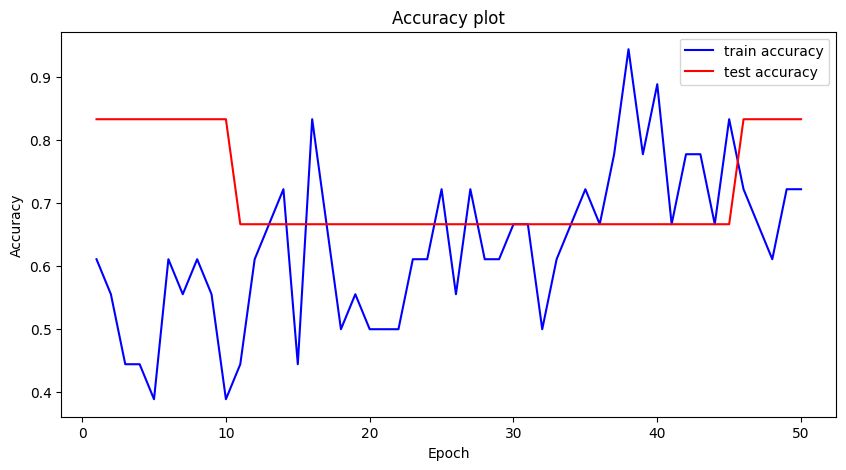

In [30]:
# Accuracy on train data :
accuracy = history.history['categorical_accuracy']

# Accuracy on test data :
val_accuracy = history.history['val_categorical_accuracy']
epochs = range(1, len(accuracy) + 1)  # Epochs

# Accuracy line plot :
plt.figure(figsize=(10, 5))
plt.plot(epochs, accuracy, 'b', label='train accuracy')
plt.plot(epochs, val_accuracy, 'r', label='test accuracy')
plt.title('Accuracy plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend();

In [31]:
# Assuming you have test data (X_test, y_test)
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Total Accuracy: {accuracy * 100:.2f}%")


Total Accuracy: 83.33%
